# Circular Dichroism
Examples on how to plot and analyse data from chirascan CD instruments.

## cd_experiment class
This class is the base for CD data analysis. It is meant to parse and process data from a single data file. Provided with a csv file containing the data it can parse the data. It allows to provide user based input of sample data (e.g. sample name, concentration, pathlength of the cuvette, number of peptide bonds). The class has a function to subtract blank data and if sample data was provided, it can convert the measured mdeg into MRE.

The sample data can be provided as a dictionary. Note that some sample data (sample name and cell pathlength) may have been parsed automatically from the result file if the respective data was provided to the instrument when running the experiment. Any sample data manually provided by the user via the sample_dict will overwrite the automatically parsed data. If you want to keep the sample name and pathlength automatically parsed from the results file, simply don't provide these information in the sample_dict.

In [1]:
import wetlabtools
import seaborn as sns
import matplotlib.pyplot as plt

cd_data = 'example_data/cd/example_premelt_5uM_PBS.csv'
buffer_data = 'example_data/cd/buffer.csv'

# concentration must be provided in µM
# pathlength must be provided in mm
sample_dict = {
    'Cell1': {
        'sample_id': 'sample_1',
        'conc': 5,                     
        'n_pep': 288,
        'pathlength': 1
    },
    'Cell2': {
        'sample_id': 'sample_2',
        'conc': 5,
        'n_pep': 288,
        'pathlength': 1
    }
}

cd = wetlabtools.chirascan.cd_experiment(result_file=cd_data, sample_data=sample_dict)
cd.subtract_blank(buffer_data)
cd.convert('mrex103')

Loading BokehJS ...

subtracted blank
converted to mrex103


### Accessing data and information
Data and sample information can easily be accessed:

In [2]:
data = cd.get_data(cells=[1, 2]) # cd.get_data() will return the data of all cells
data['CircularDichroism']

,Wavelength,Repeat,value,Cell,sample_id,conc,n_pep,pathlength
0,260,0,-0.079415,1,sample_1,5,288,1
1,260,1,-0.007314,1,sample_1,5,288,1
2,260,2,-0.041104,1,sample_1,5,288,1
3,260,0,-0.106290,2,sample_2,5,288,1
4,260,1,-0.043567,2,sample_2,5,288,1
...,...,...,...,...,...,...,...,...
361,200,1,9.448261,1,sample_1,5,288,1
362,200,2,7.993451,1,sample_1,5,288,1
363,200,0,8.620001,2,sample_2,5,288,1
364,200,1,8.597211,2,sample_2,5,288,1


In [3]:
data['Absorbance']

,Wavelength,Repeat,value,Cell,sample_id,conc,n_pep,pathlength
0,260,0,0.119622,1,sample_1,5,288,1
1,259,0,0.123049,1,sample_1,5,288,1
2,258,0,0.124104,1,sample_1,5,288,1
3,257,0,0.121069,1,sample_1,5,288,1
4,256,0,0.122789,1,sample_1,5,288,1
...,...,...,...,...,...,...,...,...
361,204,2,0.675204,2,sample_2,5,288,1
362,203,2,0.745416,2,sample_2,5,288,1
363,202,2,0.841449,2,sample_2,5,288,1
364,201,2,0.957130,2,sample_2,5,288,1


In [4]:
cd.get_samples()

,sample_id,conc,n_pep,pathlength,Cell
0,sample_1,5,288,1,1
1,sample_2,5,288,1,2


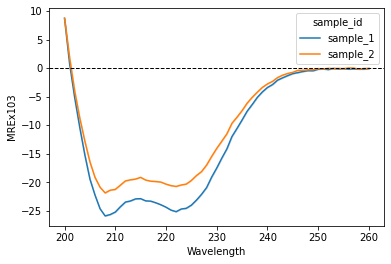

In [5]:
p = sns.lineplot(
    data['CircularDichroism'], 
    x='Wavelength', 
    y='value', 
    hue='sample_id', 
    errorbar=('ci', False)
)
p.axhline(y=0, ls='--', color="black", linewidth=1)
p.axes.set_ylabel('MREx103')
plt.show()

## Layouts
Most of the time a CD experiment will not contain only one CD run, but multiple. Layouts are meant to plot data from multiple data files in a simple way. They require data to be provided in a more specific format.

### Single wavelength melts
This layout allows to plot pre- and post-melt full spectra on the left and show a cd melt on the right. Thermal melts are typically recorded at a single wavelength to save time on the instrument. The quality control data is displayed as small plots underneath. This plotting style was inspired by A.H. 

subtracted blank
subtracted blank
subtracted blank
converted to MREx103
converted to MREx103
converted to MREx103
saving file to example_data/cd/plots/sample_1.png
saving file to example_data/cd/plots/sample_1.svg


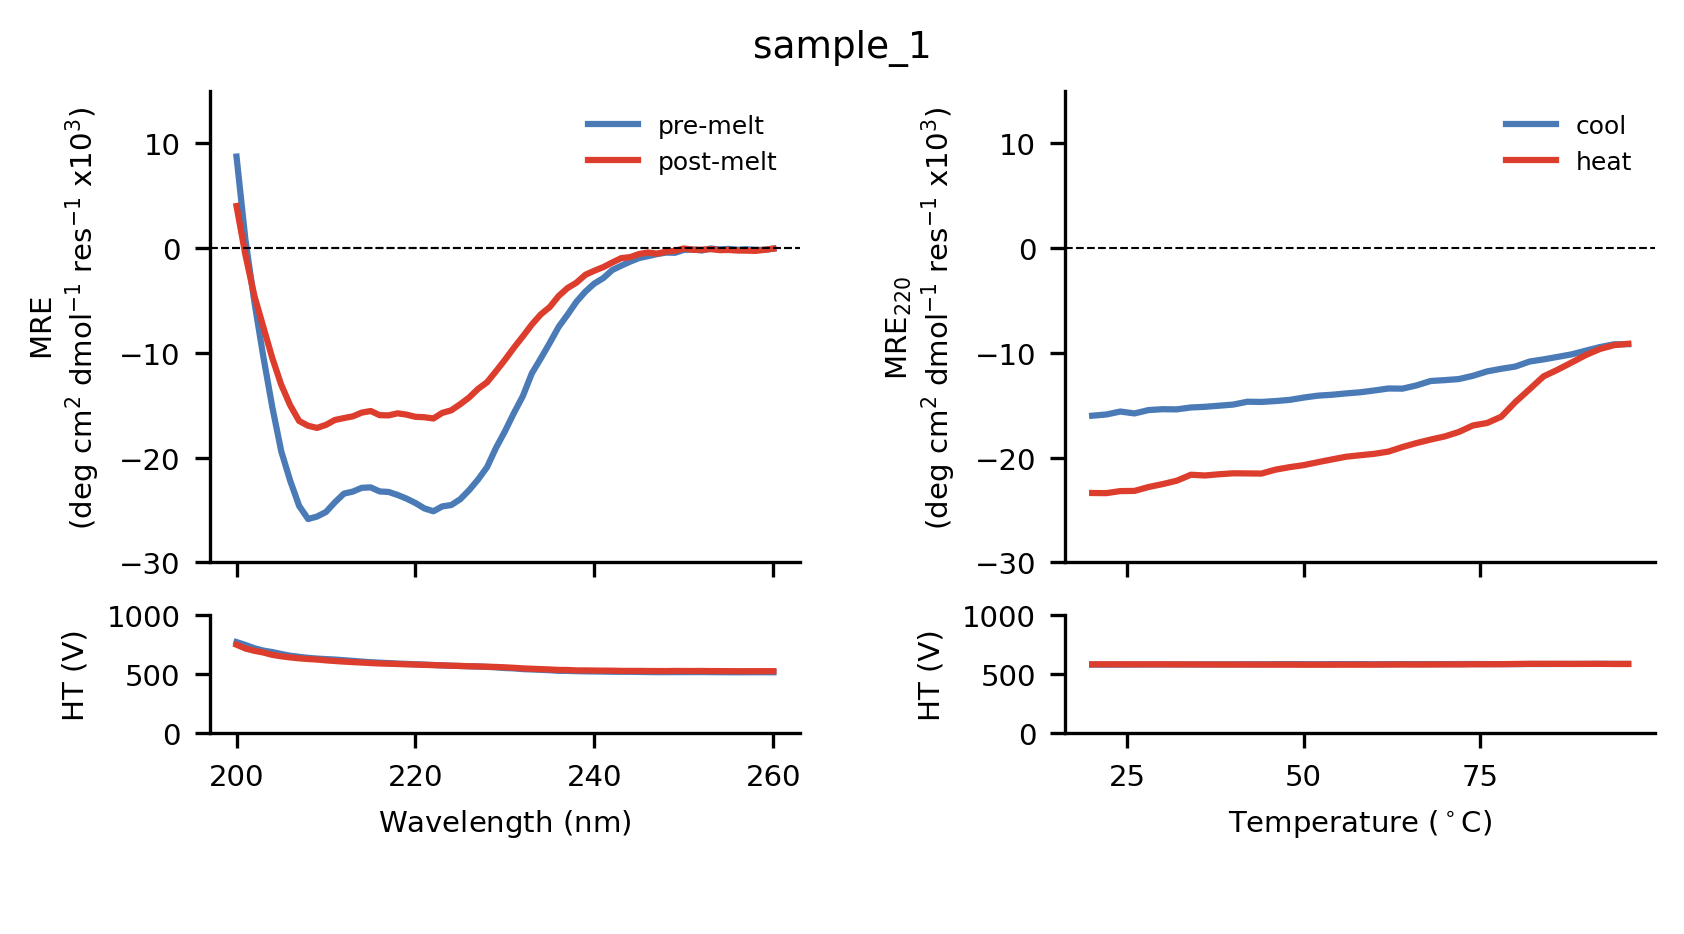

saving file to example_data/cd/plots/sample_2.png
saving file to example_data/cd/plots/sample_2.svg


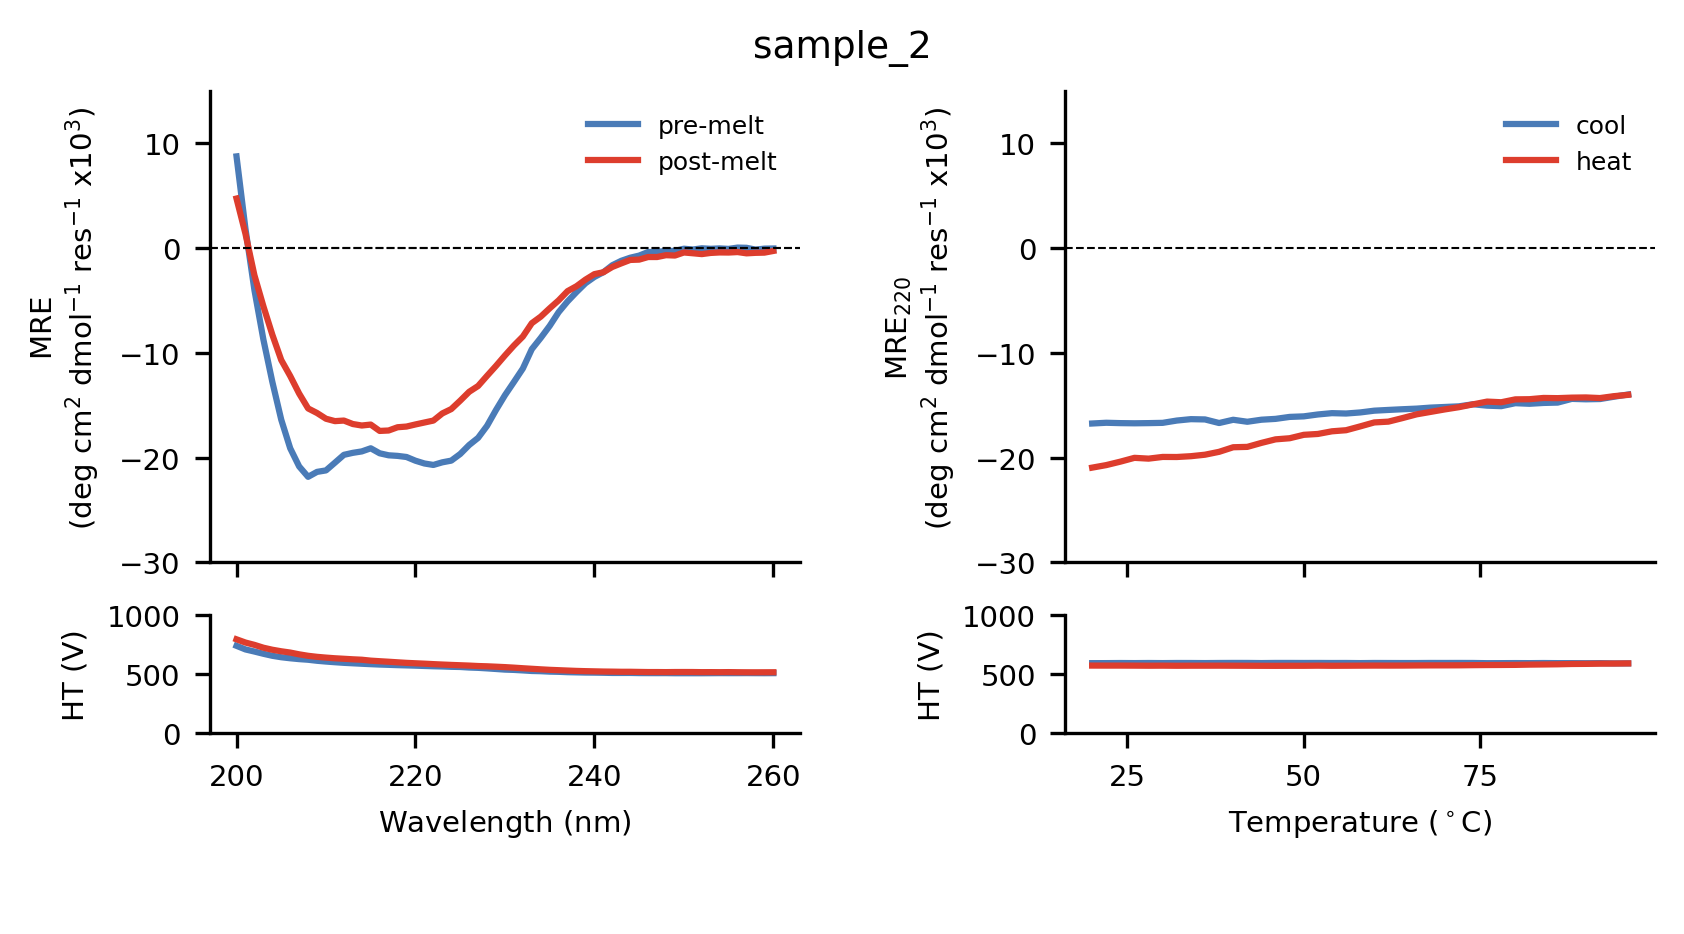

In [6]:
import os

# data directory
cd_data_dir = 'example_data/cd'

# find files in directory
files = {
    'premelt': '_premelt_', 
    'postmelt': '_postmelt_', 
    'melt': '_melt_', 
    'blank': 'buffer'
}

for key in files.keys():
    f = [f for f in os.listdir(cd_data_dir) if files[key] in f and f.endswith('.csv')]
    files[key] = os.path.join(cd_data_dir, f[0])

wetlabtools.chirascan.layouts.single_wvl_melt(premelt_file=files['premelt'], 
                                              postmelt_file=files['postmelt'], 
                                              melt_file=files['melt'], 
                                              blank_file=files['blank'], 
                                              sample_data=sample_dict, 
                                              wvl_lim=(200,260), 
                                              ylim=(-30,15),
                                              save_png=True, 
                                              save_svg=True)

### Full spectra temperature melts
If you recorded full spectra at each temperature, you can use this layout to plot the experiment in a similar way as above. You can specify the wavelength to use for the melting curve.

subtracted blank
converted to mrex103


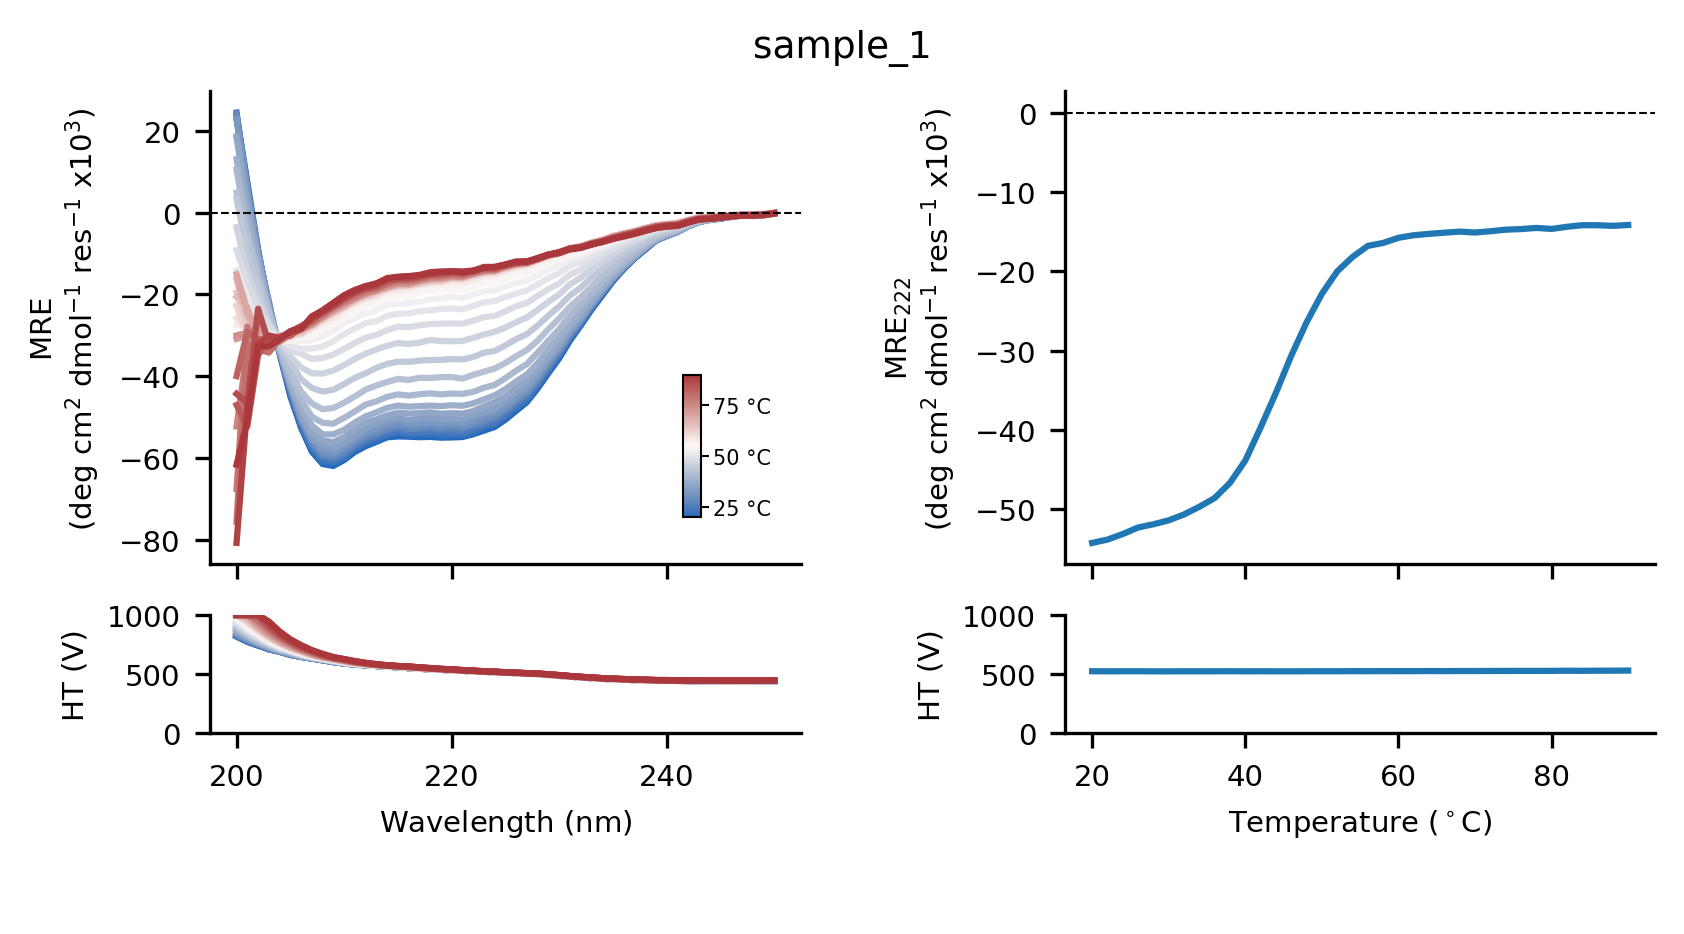

In [7]:
sample_dict = {
    'Cell1': {
        'sample_id': 'sample_1',
        'conc': 10,                     
        'n_pep': 198,
        'pathlength': 1
    }
}

wetlabtools.chirascan.layouts.full_spectrum_melt(
    melt_file='example_data/cd/sample_1.csv',
    blank_file='example_data/cd/buffer.csv',
    sample_data=sample_dict,
    wvl_lim=(200,260),
    melt_wavelength=222, 
    save_png=False,
    save_svg=False
)

If you recorded many spectra, plotting all of them might be confusing and compromising readability of the plot. You can reduce the number of spectra being plotted by adjusting the settting ```n_spectra```. In this case, it might be a good idea to change the legend from continuous to discrete. If you don't like the default color palette, choose a different one (from seaborn) using ```colormap```:

subtracted blank
converted to mrex103


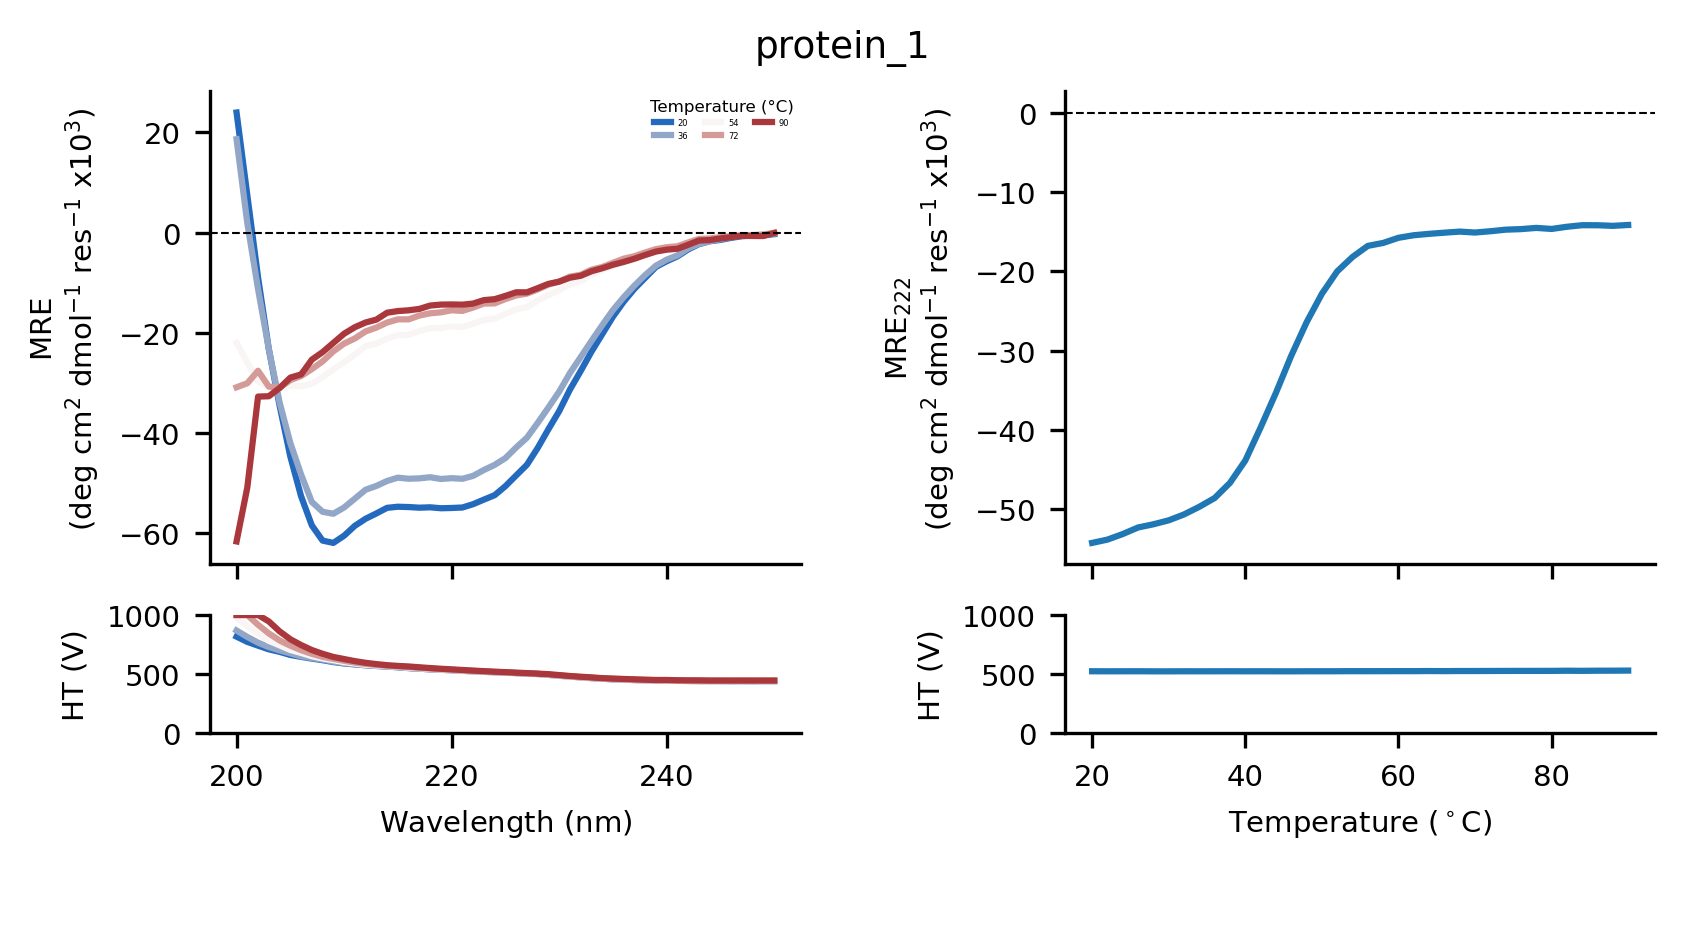

In [8]:
wetlabtools.chirascan.layouts.full_spectrum_melt(
    melt_file='example_data/cd/sample_1.csv',
    blank_file='example_data/cd/buffer.csv',
    wvl_lim=(200,260),
    melt_wavelength=222, 
    n_spectra=5,
    legend='discrete',
    save_png=False,
    save_svg=False
)

If you want to show only the lowest and highest temperature, set ```n_spectra = 2```. You can change the color palette by passing the name of a seaborn color palette to ```colormap```:

subtracted blank
converted to mrex103


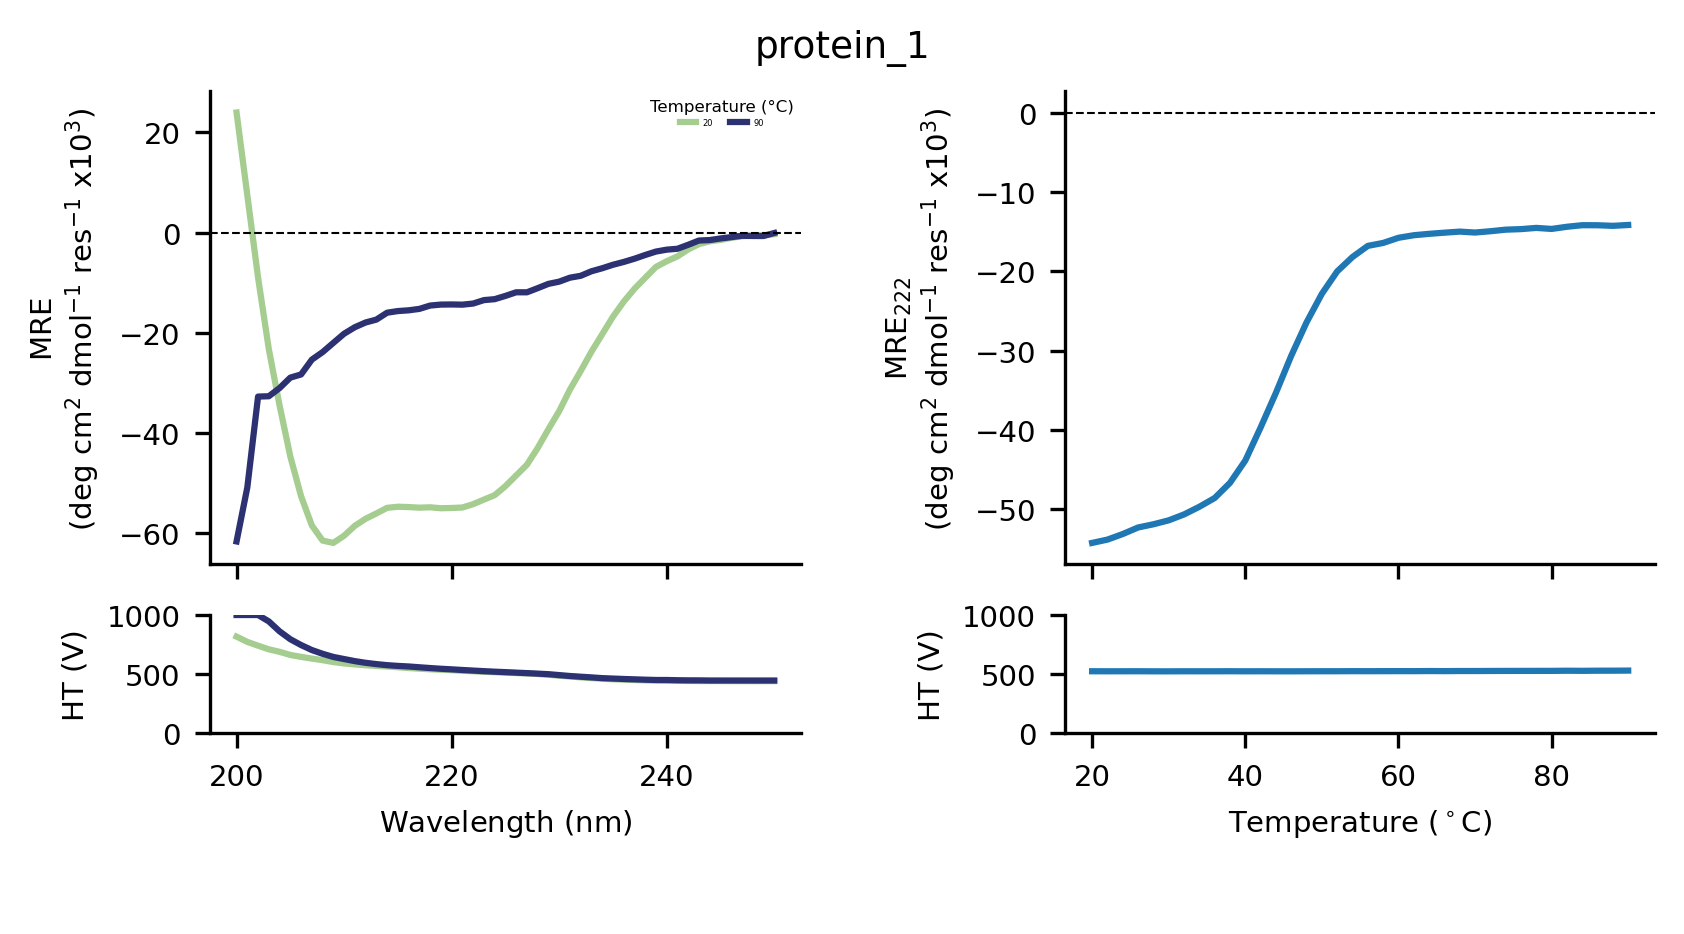

In [9]:
wetlabtools.chirascan.layouts.full_spectrum_melt(
    melt_file='example_data/cd/sample_1.csv',
    blank_file='example_data/cd/buffer.csv',
    wvl_lim=(200,260),
    melt_wavelength=222, 
    n_spectra=2,
    legend='discrete',
    colormap='crest',
    save_png=False,
    save_svg=False
)